In [ ]:
a=3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3 as lite


In [2]:
database = 'observations.db'
con = lite.connect(database)


In [ ]:
#R1
#
query = '''select d.StarID as StarID, o.MJD as MJD, d.Flux1/d.dFlux1 as SNR from Observations as o join Data as d on o.ID == d.ObservationID 
where o.MJD > 56800 and o.MJD < 57300 '''
data1a = pd.read_sql_query(query,con)
plt.clf()

query = '''select count(d.StarID) from 
data as d where 
(select count(*) from data as d2 where d.Flux1/d.dFlux1 > 5 and d.StarID == d2.StarID)  == (select count(*) from data as d3 where d.StarID == d3.StarID)'''
data1b = pd.read_sql_query(query,con)

print data1b
#sns.kdeplot(data['SNR'])
#plt.axvline(5)
#plt.show()


In [165]:
#R2
#query = '''select d.StarID, 
#(select j.Mag1 from Data as j join Observations as o on j.ObservationID == o.ID where o.Filter == 'J' and j.StarID == d.StarID) as J,
#(select h.Mag1 from Data as h join Observations as o on h.ObservationID == o.ID where o.Filter == 'H' and h.StarID == d.StarID) as H
#from data as d'''
query = '''select J.StarID, J.Mag1 as J, H.Mag1 as H, J.Mag1 - H.Mag1 as J_H from J join H on J.StarID == H.StarID '''#''' where J_H > 1.5 '''
data2 = pd.read_sql_query(query,con)

J_H = np.array(data2['J_H'])
ind = np.arange(1, 3)



C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less_equal
  
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less_equal
  import sys
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


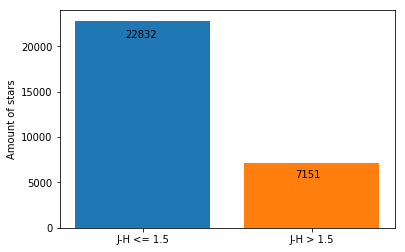

In [166]:
fig, ax = plt.subplots()
plt.bar(1, len(J_H[J_H <= 1.5]))
plt.bar(2, len(J_H[J_H > 1.5]))

ax.set_xticks(ind)
ax.set_xticklabels(['J-H <= 1.5', 'J-H > 1.5'])
ax.text(0.9 , 21000, str(len(J_H[J_H <= 1.5])), color='k')
ax.text(1.9 , 5500, str(len(J_H[J_H > 1.5])), color='k')

plt.ylabel('Amount of stars')
plt.savefig('J_H.png')
plt.show()

In [119]:
#R3 
#very slow
query = '''select
d.StarID, d.Flux1, d.dFlux1, (select avg(k.Flux1) from (select * from data as d1 join observations as o on d1.ObservationID == o.ID where filter == 'Ks') as k where d.StarID == k.StarID)
from (select * from data as d1 join observations as o on d1.ObservationID == o.ID where filter == 'Ks') as d'''

data = pd.read_sql_query(query,con)
print data

       d.StarID     d.Flux1  d.dFlux1  \
0             0    4714.600   144.591   
1             1    5876.420   146.330   
2             2    5616.170   145.080   
3             3    1471.170   172.435   
4             4    7631.560   176.499   
5             5    7125.330   146.999   
6             6    6672.930   145.689   
7             7    4168.160   144.344   
8             8    6728.850   208.522   
9             9    7406.980   146.031   
10           10    7240.440   145.950   
11           11    1717.000   174.143   
12           12    6917.740   175.067   
13           13    2252.080   187.653   
14           14    3833.300   174.102   
15           15    3522.490   190.618   
16           16    5157.900   145.484   
17           17    4217.560   189.593   
18           18    2405.910   143.915   
19           19    2466.090   143.952   
20           20    2042.220   172.503   
21           21   33153.000   160.262   
22           22   12794.900   180.047   
23           23 

In [ ]:
data3 = np.array(data)
StarID = data3[:,0]
Flux = data3[:,1]
dFlux = data3[:,2]
AvFlux = data3[:,3]

stars = len(set(StarID))
var_stars =  len(set(StarID[(Flux-AvFlux) > 20* dFlux]))

ax.set_xticks(ind)
ax.set_xticklabels(['F - <F> <= 20 * dF', 'F - <F> > 20 * dF'])
ax.text(0.9 , stars-var_stars-1000, stars-var_stars, color='k')
ax.text(1.9 , var_stars-1000, var_stars, color='k')

plt.ylabel('Amount of stars')
plt.savefig('J_H.png')
plt.show()

In [97]:
#R4
query = '''select * from Observations order by FieldID, ID'''
data4 = pd.read_sql_query(query,con)
print data4

    ID  FieldID              Filename Filter           MJD  Airmass  Exptime
0    1        1        Field-1-Z.fits      Z  57267.167107   1.6405     40.0
1    2        1        Field-1-J.fits      J  57257.050432   1.0105     48.0
2    3        1        Field-1-H.fits      H  57257.044108   1.0060     16.0
3    4        1  Field-1-Ks-E002.fits     Ks  56788.346937   1.0230     16.0
4    5        1  Field-1-Ks-E001.fits     Ks  56561.002016   1.0790     16.0
5    6        1  Field-1-Ks-E003.fits     Ks  56829.039051   1.6085     16.0
6    7        1        Field-1-Y.fits      Y  57267.159665   1.5605     40.0
7    8        2        Field-2-Z.fits      Z  57268.167107   1.6405     40.0
8    9        2        Field-2-J.fits      J  57258.050432   1.0105     48.0
9   10        2        Field-2-H.fits      H  57258.044108   1.0060     16.0
10  11        2  Field-2-Ks-E001.fits     Ks  56789.346937   1.0230     16.0
11  12        2        Field-2-Y.fits      Y  57268.159665   1.5605     40.0

In [98]:
#R5
query = '''select Y.StarID as StarID, Y.Mag1 as Y, Z.Mag1 as Z, J.Mag1 as J, H.Mag1 as H, Ks.Mag1 as Ks
from (((Y join Z on Y.StarID == Z.StarID ) as a join J on J.StarID == a.StarID) as b join H on H.StarID == b.StarID) as c join Ks on Ks.StarID == c.StarID
where Y.Flux1/Y.dFlux1 > 30 and Z.Flux1/Z.dFlux1 > 30 and J.Flux1/J.dFlux1 > 30 and H.Flux1/H.dFlux1 > 30 and Ks.Flux1/Ks.dFlux1 > 30'''
data5 = pd.read_sql_query(query,con)


In [112]:
Y = np.array(data5["Y"], dtype = float)
Z = np.array(data5["Z"], dtype = float)
J = np.array(data5["J"], dtype = float)
H = np.array(data5["H"], dtype = float)
Ks = np.array(data5["Ks"], dtype = float)

X = np.vstack(([Y,Z,J,H,Ks])).T

inds = np.arange(len(Y))
np.random.shuffle(inds)
subset = inds[0:100]

df = pd.DataFrame(X[subset,:], columns=['Y','Z','J','H','Ks'])
g = sns.PairGrid(df, diag_sharey=False)

g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot)
g.savefig('R5.png');

print "amount of stars with SNR > 30 in all bands: ", len(Y)

amount of stars with SNR > 30 in all bands:  15344


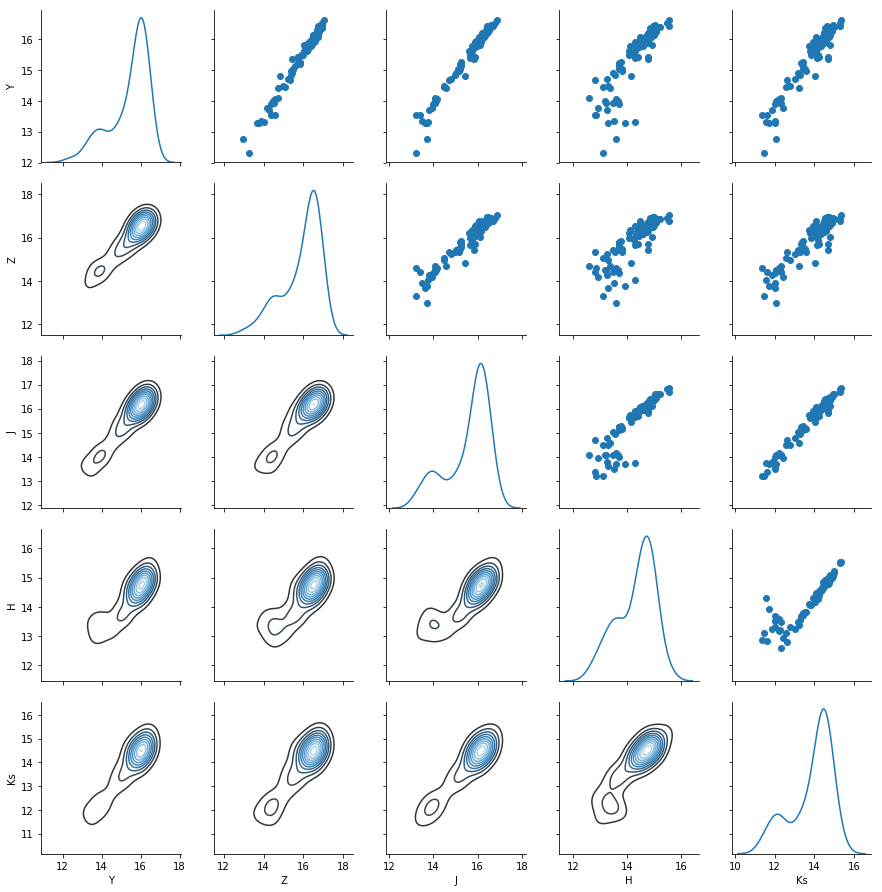

In [113]:
plt.show()

In [8]:
#c
query = '''select Y.Mag1 - J.Mag1 as Y_J, J.Mag1 - H.Mag1 as J_H from (Y join H on Y.StarID == H.StarID) as a join J on a.StarID == J.StarID'''
data6 = pd.read_sql_query(query,con)

In [95]:
from sklearn.neighbors import KernelDensity
bw = 0.1
Y_J = np.array(data6['Y_J'], dtype=float)
J_H = np.array(data6['J_H'], dtype=float)
a = np.vstack([Y_J,J_H]).T
ok1 = np.where( Y_J != np.nan )
ok2 = np.where(J_H != np.nan)
kde = KernelDensity(bandwidth=bw, kernel='gaussian').fit(a[(np.isfinite(Y_J)) & (np.isfinite(J_H)) ,:])

samples = kde.sample(n_samples=100000)
print samples.shape
#plt.plot(samples[0:100,0], samples[0:100,1], '.')

#print samples

sns.kdeplot(samples[0:1000], cmap="Blues_d")
#y = kde.predict(x)

#ok = np.where( (Y_J != np.nan) ) 
#kde2(Y_J[ok], J_H[ok], ax)

(100000L, 2L)
[[-0.32736371  1.3692458 ]
 [-0.40835978  1.28859443]
 [-0.12572751  1.69991682]
 ..., 
 [-0.11679191  1.17017239]
 [-0.39719659  1.47086842]
 [-0.08245779  1.16187835]]


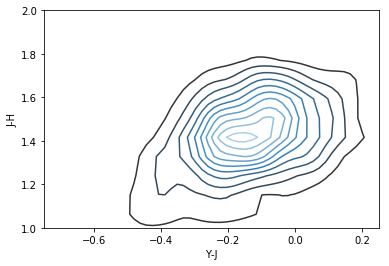

In [96]:
plt.axis(xmin = -0.75, xmax = 0.25, ymin = 1, ymax = 2)
plt.xlabel('Y - J')
plt.ylabel('J - H')
plt.savefig('colourplot.png')
plt.show()